In [9]:
from audiot import *

import numpy as np
import matplotlib.pyplot as plt

In [10]:
sr = 44100
total_duration = 1
event_duration = 0.8
start = 0.1

f0 = 300
f1 = 880

alpha = 0.8

source_signal = np.zeros(int(sr * total_duration))
target_signal = np.zeros_like(source_signal)

for t in range(int(event_duration * sr)):
    source_signal[int(start * sr) + t] = np.sin(2*np.pi*t*f0 / sr)
    source_signal[int(start * sr) + t] += 0.5*np.sin(2*np.pi*t*f0*2 / sr)
    target_signal[int(start * sr) + t] = np.sin(2*np.pi*t*f1 / sr)
    target_signal[int(start * sr) + t] += 0.3*np.sin(2*np.pi*t*f1*2 / sr)

smooth_len = 2000
if smooth_len > 0:
    smoothing = np.linspace(0, 1, smooth_len)
    source_signal[int(start * sr):smooth_len + int(start * sr)] *= smoothing
    source_signal[int((start + event_duration) * sr)-smooth_len:int((start + event_duration) * sr)] *= np.flip(smoothing)
    target_signal[int(start * sr):smooth_len + int(start * sr)] *= smoothing
    target_signal[int((start + event_duration) * sr)-smooth_len:int((start + event_duration) * sr)] *= np.flip(smoothing)

signals = [source_signal, target_signal]
titles = ['source', 'target']
audio_widgets = [audio_widget(signal, title) for signal, title in zip(signals, titles)]

grid = widgets.VBox(audio_widgets)
grid

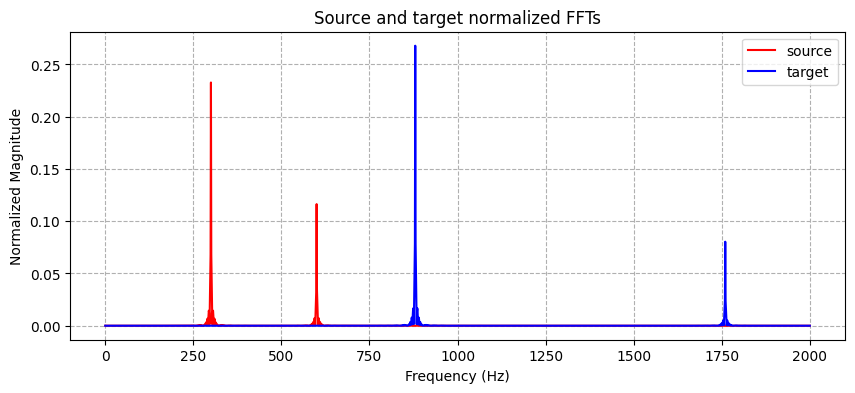

In [11]:
max_frequency = 2000

source_fft, support = fft(source_signal, sr=sr, return_support=True, max_frequency=max_frequency)
target_fft = fft(target_signal, sr=sr, max_frequency=max_frequency)

source = np.abs(source_fft) / np.sum(np.abs(source_fft))
target = np.abs(target_fft) / np.sum(np.abs(target_fft))

plot_signals(support, signals=[source, target], labels=['source', 'target'], title='Source and target normalized FFTs', colors=['r', 'b'])

Text(0.5, 1.0, 'L2 cost matrix')

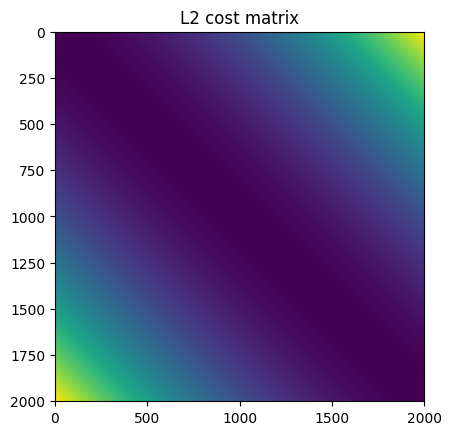

In [19]:
# Optimal transport

dist = lambda x, y: (x-y)**2

M = cost_matrix(support, dist=dist)

plt.imshow(M)
plt.title('L2 cost matrix')

In [13]:
alpha = 0.5

interpolation, plan = emd(support, source, target, M, alpha)


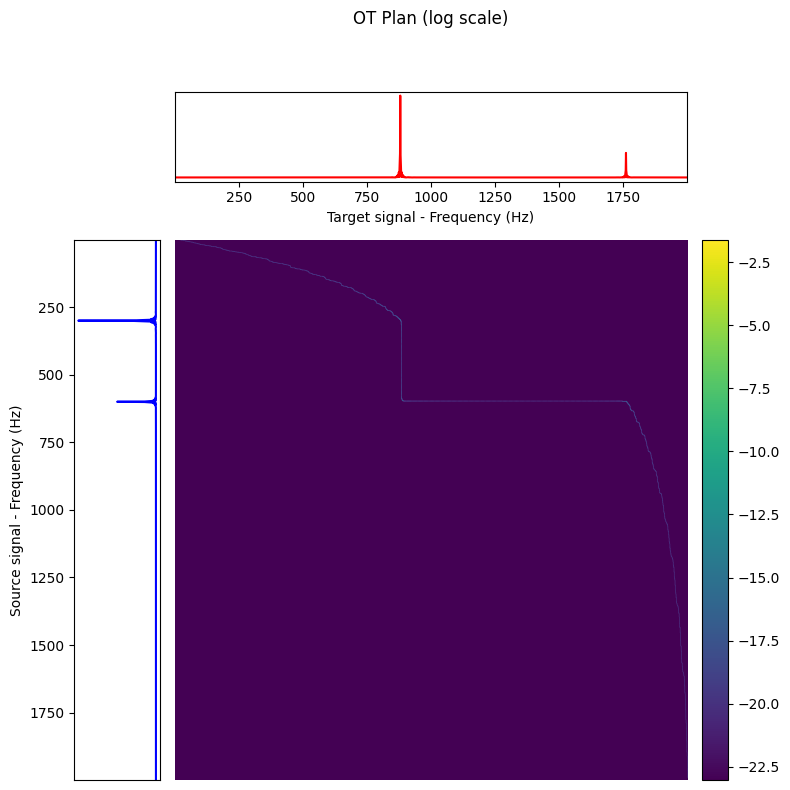

In [20]:
source_freq_start=0
source_freq_end=-1
target_freq_start=0
target_freq_end=-1
plot_plan_spectra(support, 
                  source, 
                  target, 
                  plan, 
                  source_freq_start=source_freq_start, 
                  source_freq_end=source_freq_end, 
                  target_freq_start=target_freq_start, 
                  target_freq_end=target_freq_end, 
                  log=True, 
                  epsilon=1e-10)


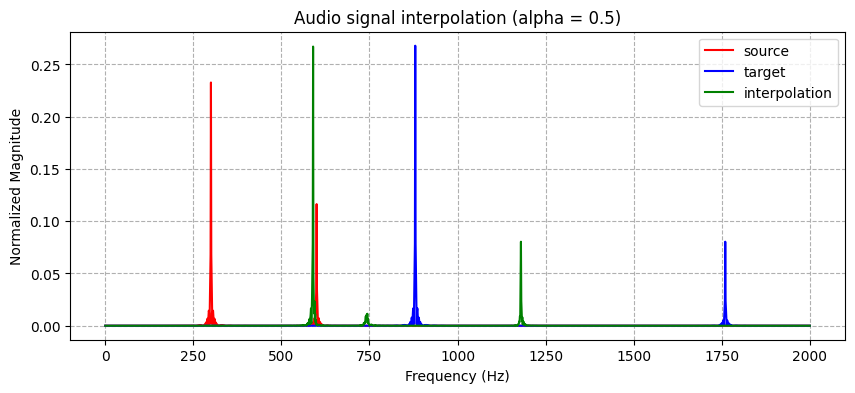

In [17]:
plot_signals(support, signals=[source, target, interpolation], labels=['source', 'target', 'interpolation'], title=f'Audio signal interpolation (alpha = {alpha})', colors=['r', 'b', 'g'])

In [16]:

desired_interpolation = SOUNDS / 'digital/F3.wav'

desired_signal = load_signal(desired_interpolation, sr=sr, duration=duration, smooth_len=smooth_len)

desired_fft = fft_normalized(desired_signal, sr=sr, return_support=False, max_frequency=max_frequency)

plot_signals(support, signals=[desired_fft, interpolation], labels=['desired_fft', 'interpolation'], title='Desired vs obtained interpolation', colors=['purple', 'g'])

NameError: name 'duration' is not defined